# IBM Advance Datascience Specialization - Capstone Project [Exploratory Data Analysis]

#### Dataset Details: Real World Car Insurance Fraud Dataset - Non Synthetic.
Source: Kaggle<br>
URL : https://www.kaggle.com/datasets/incarnyx/car-insurance-fraud<br>
DataSet Description: https://www.kaggle.com/datasets/incarnyx/car-insurance-fraud/discussion/133719 <br>
Dataset More Information: https://sites.google.com/site/cliftonphua/publications?authuser=0

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '4' 
from silence_tensorflow import silence_tensorflow
silence_tensorflow()


In [2]:
%matplotlib ipympl

In [3]:
import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA, TruncatedSVD, FastICA, IncrementalPCA
from sklearn.manifold import TSNE
import umap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, AdaBoostClassifier, \
     RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import auc, roc_curve, classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score
import xgboost as xgb
import tensorflow as tf
import tfgraphviz as tfg
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Softmax, Dropout, BatchNormalization, Add, InputLayer
from tensorflow.keras.metrics import mae, mse, Accuracy, AUC
import dill as pickle
import logging
logging.getLogger('tensorflow').disabled = True
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.get_logger().setLevel(logging.ERROR)
tf.autograph.set_verbosity(3)

In [4]:
pd.set_option('display.max_columns', None)

## Loading Data

In [5]:
df = pd.read_excel('./Dataset.xlsx', 
                   sheet_name = 'Sheet1')
df.head(15)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1.0,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4.0,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3.0,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2.0,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36.0,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1.0,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339
5,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,30.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,9,7,400,4.0,more than 30,more than 30,none,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision,57166.760954
6,Mar,2,Sunday,Mazda,Urban,Wednesday,Mar,3,Male,Single,71.0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,0,11,7,400,3.0,more than 30,more than 30,none,more than 7,over 65,No,No,External,none,no change,1 vehicle,1994,All Perils,62624.228715
7,Mar,5,Monday,Honda,Urban,Monday,Mar,5,Male,Married,52.0,Policy Holder,Sedan - Liability,Sport,20000 to 29000,0,12,13,400,1.0,more than 30,more than 30,2 to 4,more than 7,41 to 50,No,No,External,none,no change,1 vehicle,1994,Liability,103420.785275
8,Jan,3,Friday,Ford,Urban,Friday,Jan,3,Male,Married,28.0,Policy Holder,Sedan - Liability,Sport,more than 69000,0,13,11,400,1.0,more than 30,more than 30,1,7 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Liability,59747.549439
9,Jan,5,Friday,Honda,Rural,Wednesday,Feb,1,Male,Single,0.0,Third Party,Sedan - Collision,Sedan,more than 69000,0,14,12,400,3.0,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision,82211.859262


## Exploratory data analysis

In [6]:
print("number of columns =", len(df.columns))
print("number of feature columns =", len(df.columns)-1)
print("number of rows(data points) =", len(df.index))

number of columns = 34
number of feature columns = 33
number of rows(data points) = 11565


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11565 entries, 0 to 11564
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 11565 non-null  object 
 1   WeekOfMonth           11565 non-null  int64  
 2   DayOfWeek             11565 non-null  object 
 3   Make                  11565 non-null  object 
 4   AccidentArea          11565 non-null  object 
 5   DayOfWeekClaimed      11565 non-null  object 
 6   MonthClaimed          11565 non-null  object 
 7   WeekOfMonthClaimed    11565 non-null  int64  
 8   Sex                   11565 non-null  object 
 9   MaritalStatus         11565 non-null  object 
 10  Age                   11560 non-null  float64
 11  Fault                 11565 non-null  object 
 12  PolicyType            11565 non-null  object 
 13  VehicleCategory       11565 non-null  object 
 14  VehiclePrice          11565 non-null  object 
 15  FraudFound_P       

In [8]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year,ClaimSize
count,11565.000000,11565.000000,11560.000000,11565.000000,11565.000000,11565.000000,11565.000000,11559.000000,11565.000000,11565.000000
mean,2.784003,2.701167,39.899567,0.059230,7710.474449,8.469780,407.617812,2.493468,1994.865975,22955.978035
std,1.284854,1.258153,13.590556,0.236066,4453.762219,4.618952,43.397393,1.118102,0.801798,26988.811719
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000,0.000000
25%,2.000000,2.000000,31.000000,0.000000,3851.000000,4.000000,400.000000,1.000000,1994.000000,4148.845001
50%,3.000000,3.000000,38.000000,0.000000,7712.000000,8.000000,400.000000,3.000000,1995.000000,8130.994563
75%,4.000000,4.000000,49.000000,0.000000,11542.000000,12.000000,400.000000,3.000000,1996.000000,46299.646944
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000,141394.159289


### Basic Analysis of Data

#### Basic Analysis 1 - Frauds vs Car make

In [9]:
fraud_rate_make = df.groupby('Make').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_make.columns = ['FraudRate', '#']
fraud_rate_make = fraud_rate_make.apply(lambda x: round(x, 3))
fraud_rate_make.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
Make,,
Mecedes,0.333,3
Accura,0.127,354
Saturn,0.098,41
Saab,0.086,70
Ford,0.074,338
Honda,0.062,2159
Toyota,0.061,2317
Chevrolet,0.060,1253
Mercury,0.059,68


#### Basic Analysis 2 - Frauds vs Policy Type

In [10]:
fraud_rate_pt = df.groupby('PolicyType').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_pt.columns = ['FraudRate', '#']
fraud_rate_pt = fraud_rate_pt.apply(lambda x: round(x, 3))
fraud_rate_pt.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
PolicyType,,
Utility - All Perils,0.131,251
Sport - Collision,0.130,262
Utility - Collision,0.125,24
Sedan - All Perils,0.100,3067
Sedan - Collision,0.067,4186
Sedan - Liability,0.007,3742
Sport - All Perils,0.000,19
Sport - Liability,0.000,1
Utility - Liability,0.000,13


#### Basic Analysis 3 - Frauds vs Police report and Witness Present

In [11]:
fraud_rate_rep_wit = df.groupby(['PoliceReportFiled', 'WitnessPresent']).agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_rep_wit.columns = ['FraudRate', '#']
fraud_rate_rep_wit = fraud_rate_rep_wit.apply(lambda x: round(x, 3))
fraud_rate_rep_wit.sort_values(by='FraudRate',ascending=False)

FraudRate      #
PoliceReportFiled WitnessPresent                  
No                No                  0.060  11193
                  Yes                 0.048     42
Yes               No                  0.043    304
                  Yes                 0.000     26

#### Basic Analysis 4 - Age Distribution of Policy Holders

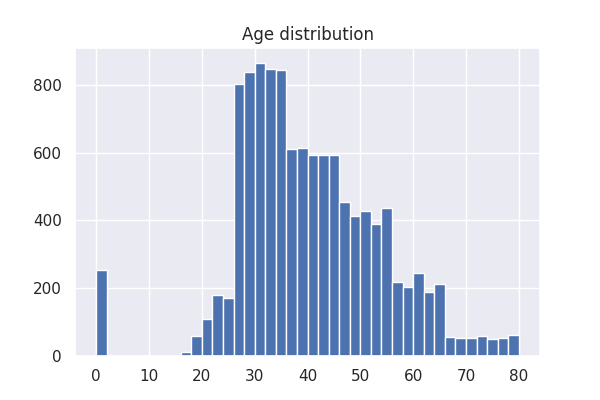

In [12]:
sns.set(style = "darkgrid")
plt.figure(figsize = (6, 4))
plt.hist(x = df['Age'], bins = 40)    #, bins = 'fd')
plt.title('Age distribution')
plt.show()

#### Basic Analysis 5 - Age Distribution of Policy Holders - Grouped By Fraud/Genuine

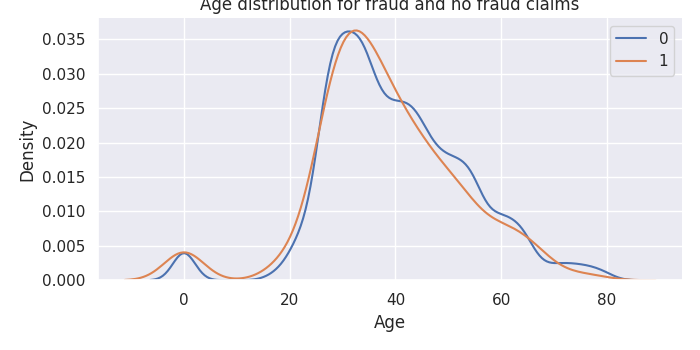

In [13]:
sns.set(style = "darkgrid")
g = sns.FacetGrid(df, hue='FraudFound_P', height = 3.5, aspect = 2)
g.map(sns.kdeplot, 'Age')
plt.title('Age distribution for fraud and no fraud claims')
plt.legend()
plt.show()

#### Basic Analysis 6 - ClaimSize Distribution of Policy Holders

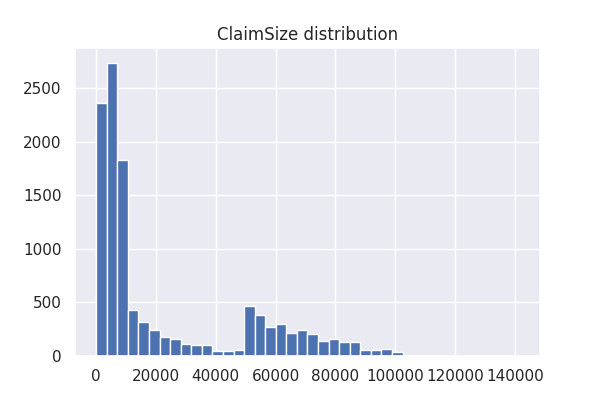

In [14]:
plt.figure(figsize = (6, 4))
sns.set(style = "darkgrid")
plt.hist(x = df['ClaimSize'], bins = 40)    #, bins = 'fd')
plt.title('ClaimSize distribution')
plt.show()

#### Basic Analysis 7 - ClaimSize Distribution of Policy Holders - Grouped By Fraud/Genuine

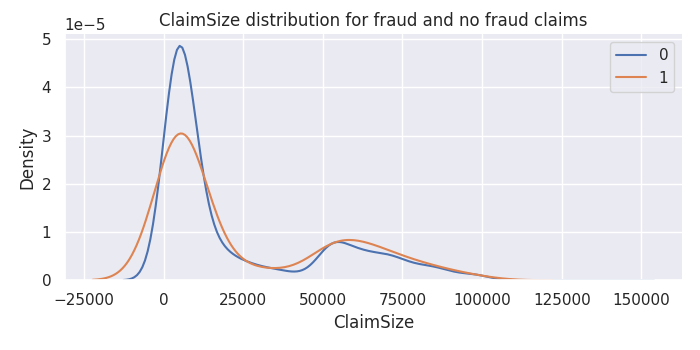

In [15]:
sns.set(style = "darkgrid")
g = sns.FacetGrid(df, hue='FraudFound_P', height = 3.5, aspect = 2)
g.map(sns.kdeplot, 'ClaimSize')
plt.title('ClaimSize distribution for fraud and no fraud claims')
plt.legend()
plt.show()

### The Features Columns Distributions View

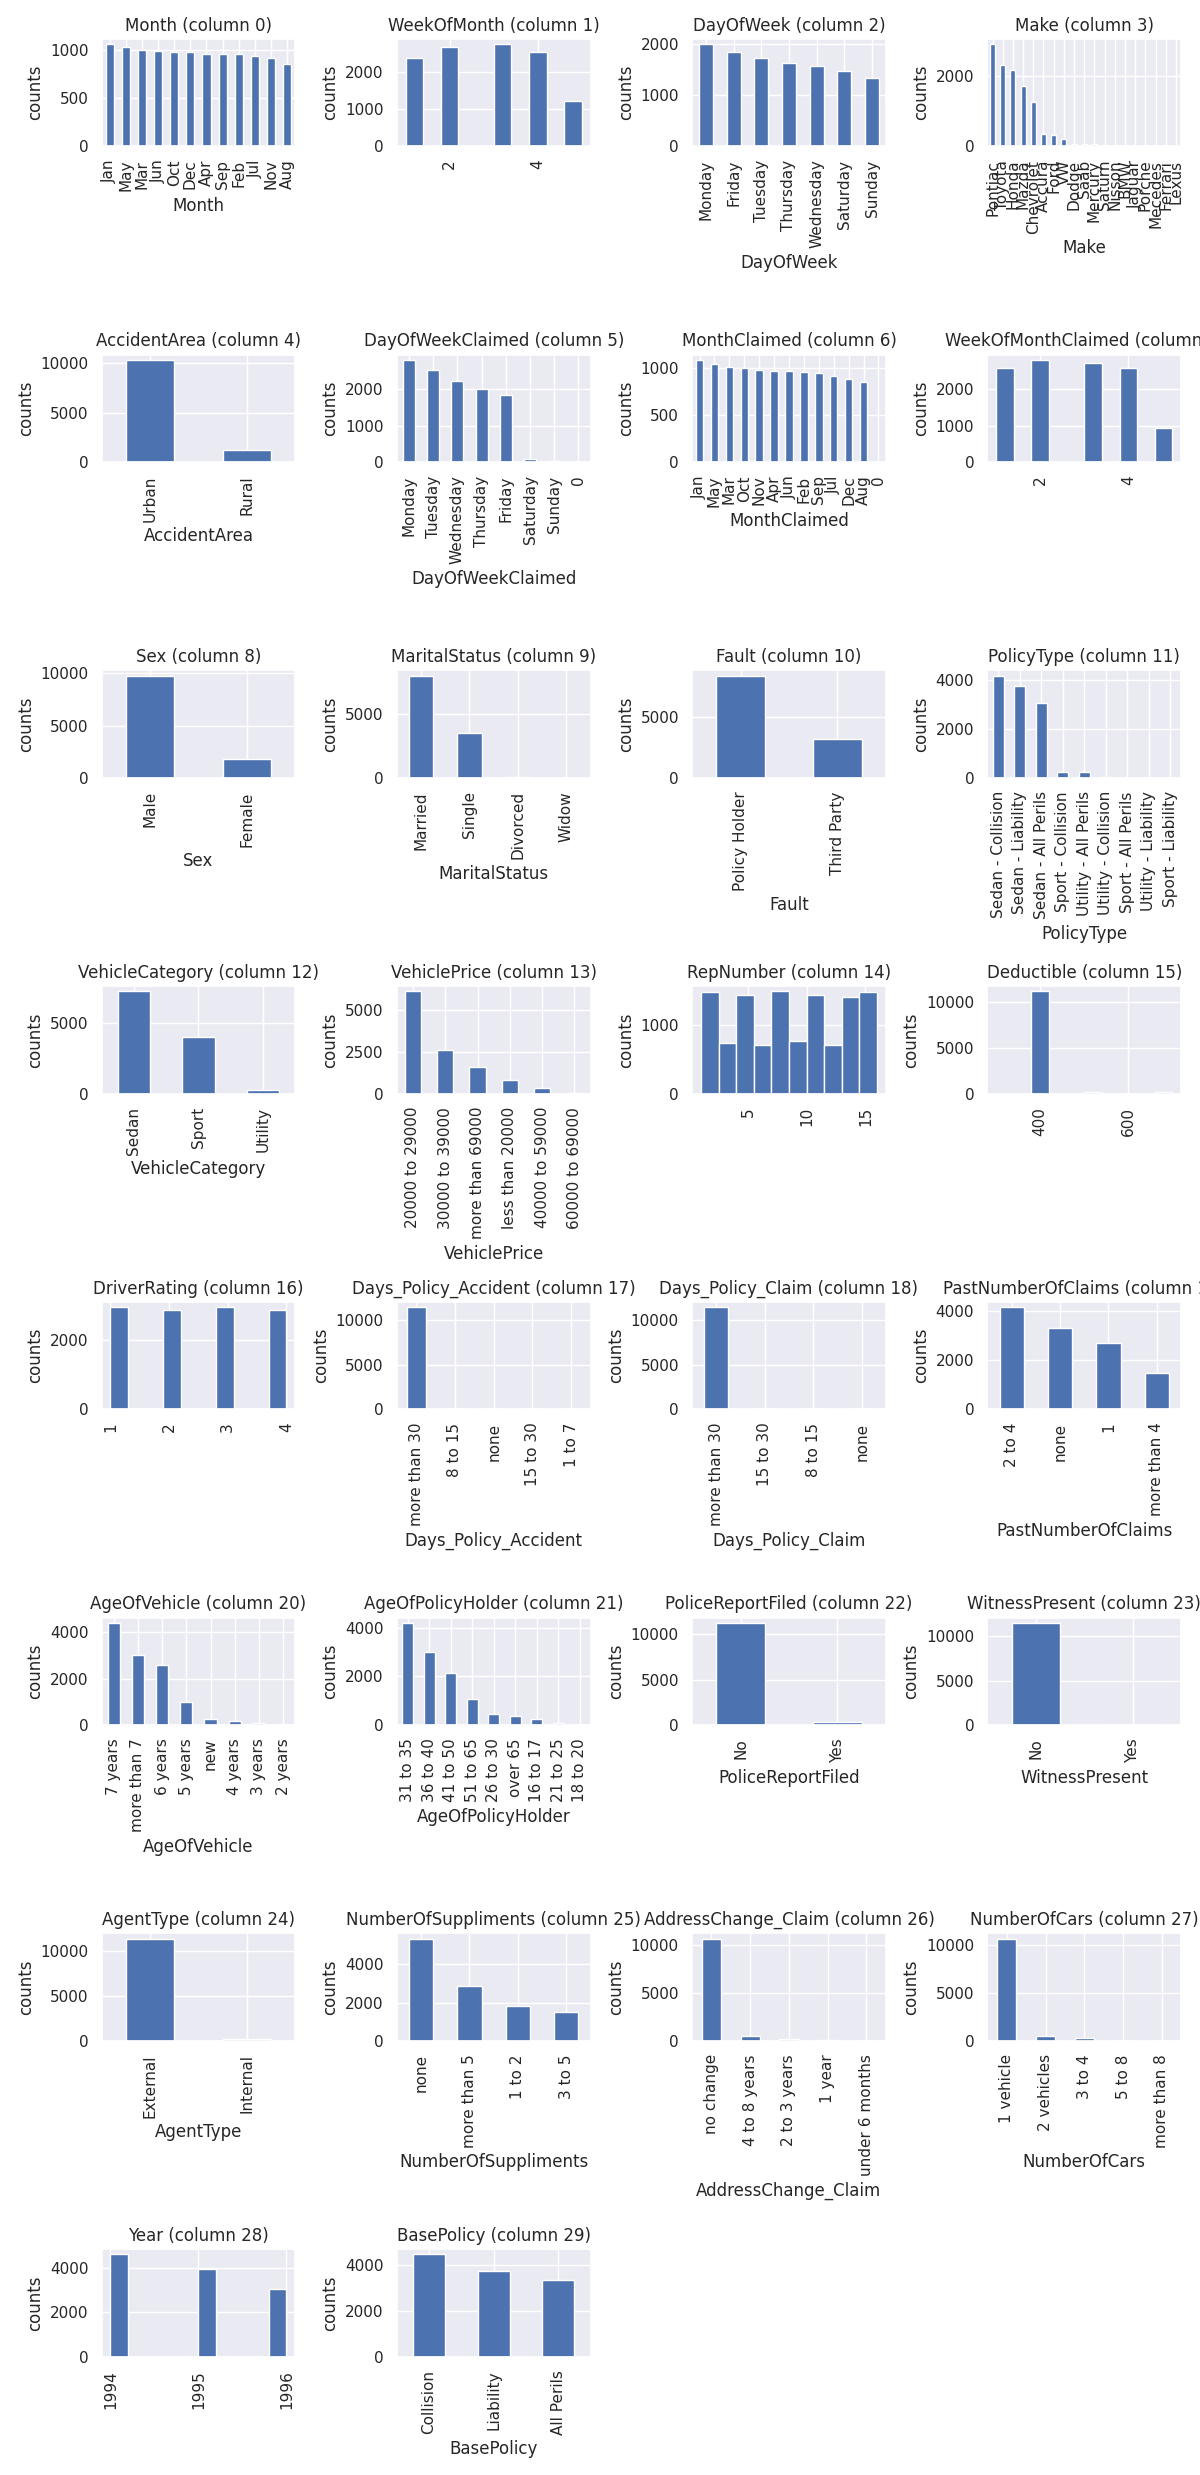

In [16]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    sub_graph_h = 3
    sub_graph_w = 3
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(figsize = (sub_graph_w*nGraphPerRow, sub_graph_h*nGraphRow))
    sns.set(style = "darkgrid")
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(int(nGraphRow), int(nGraphPerRow), i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    
    
plotPerColumnDistribution(df.drop('FraudFound_P', axis = 1), 33, 4)    

### Class Imbalance

In [29]:
lPos_class = [0.0 if i == False else 1.0 for i in (df['FraudFound_P'] == 1)]
nPos_class = sum(lPos_class)
nNeg_class = len(df.index) - nPos_class
np_weightR = nNeg_class/nPos_class

print("Number of Positive Class Data points =", nPos_class)
print("Number of Negative Class Data points =", nNeg_class)
print("Neg/pos weight ratio =", np_weightR)
print("Percentage of Positive Class =", nPos_class*100/(nPos_class+nNeg_class))
print("Percentage of Negative Class =", nNeg_class*100/(nPos_class+nNeg_class))

class_Weights = {0:(1 / nNeg_class) * (len(df.index) / 2.0), 1:(1 / nPos_class) * (len(df.index) / 2.0)}
print("Class weights =", class_Weights)

Number of Positive Class Data points = 685.0
Number of Negative Class Data points = 10880.0
Neg/pos weight ratio = 15.883211678832117
Percentage of Positive Class = 5.923043666234328
Percentage of Negative Class = 94.07695633376568
Class weights = {0: 0.5314797794117647, 1: 8.441605839416058}


### Data preparation I - Encoding String Categorical Columns

In [18]:

df_encoded = df.copy()
mean_age = df_encoded['Age'].mean()
df_encoded['Age'] = df_encoded['Age'].fillna(mean_age)
mean_DriverRating = df_encoded['DriverRating'].mean()
df_encoded['DriverRating'] = df_encoded['DriverRating'].fillna(mean_DriverRating)
df_encoded = df_encoded.dropna().reset_index(drop=True)
df_encoded.name = "Insurance Fraud Data"


label_encoder = preprocessing.LabelEncoder()

cols_to_encode = ['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'BasePolicy', \
                   'NumberOfCars', 'AddressChange_Claim', 'NumberOfSuppliments', 'WitnessPresent', 'PoliceReportFiled', \
                   'AgeOfPolicyHolder', 'AgeOfVehicle', 'Days_Policy_Claim', 'Days_Policy_Accident', 'PastNumberOfClaims', \
                   'Sex', 'MaritalStatus', 'AgentType', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice']

for col in cols_to_encode:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

In [19]:
print("number of columns =", len(df_encoded.columns))
print("number of feature columns =", len(df_encoded.columns)-1)
print("number of rows(data points) =", len(df_encoded.index))
print(df_encoded.describe())


number of columns = 34
number of feature columns = 33
number of rows(data points) = 11565
              Month   WeekOfMonth     DayOfWeek          Make  AccidentArea  \
count  11565.000000  11565.000000  11565.000000  11565.000000  11565.000000   
mean       5.537916      2.784003      2.897103     10.097968      0.895460   
std        3.419841      1.284854      2.048900      5.276479      0.305972   
min        0.000000      1.000000      0.000000      0.000000      0.000000   
25%        3.000000      2.000000      1.000000      6.000000      1.000000   
50%        6.000000      3.000000      3.000000      9.000000      1.000000   
75%        8.000000      4.000000      5.000000     13.000000      1.000000   
max       11.000000      5.000000      6.000000     18.000000      1.000000   

       DayOfWeekClaimed  MonthClaimed  WeekOfMonthClaimed           Sex  \
count      11565.000000  11565.000000        11565.000000  11565.000000   
mean           4.219628      6.583744           

In [20]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11565 entries, 0 to 11564
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 11565 non-null  int64  
 1   WeekOfMonth           11565 non-null  int64  
 2   DayOfWeek             11565 non-null  int64  
 3   Make                  11565 non-null  int64  
 4   AccidentArea          11565 non-null  int64  
 5   DayOfWeekClaimed      11565 non-null  int64  
 6   MonthClaimed          11565 non-null  int64  
 7   WeekOfMonthClaimed    11565 non-null  int64  
 8   Sex                   11565 non-null  int64  
 9   MaritalStatus         11565 non-null  int64  
 10  Age                   11565 non-null  float64
 11  Fault                 11565 non-null  int64  
 12  PolicyType            11565 non-null  int64  
 13  VehicleCategory       11565 non-null  int64  
 14  VehiclePrice          11565 non-null  int64  
 15  FraudFound_P       

### The Features Correlation Matrix

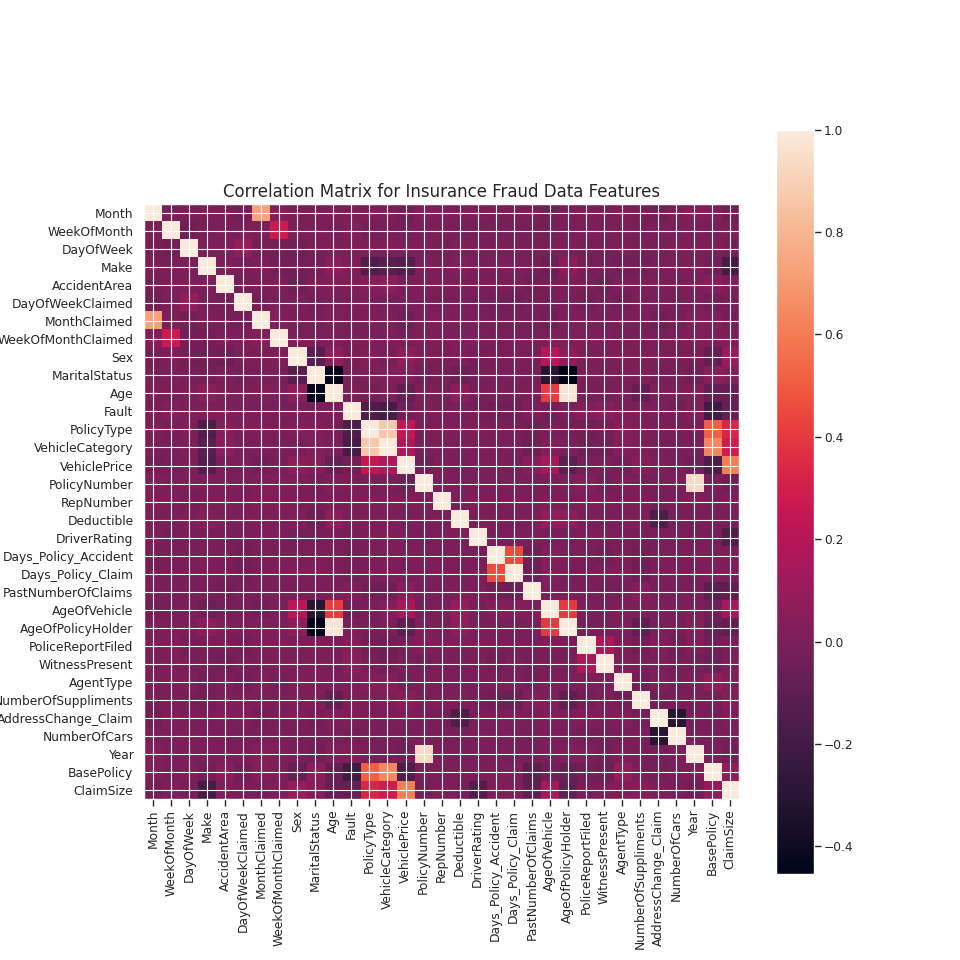

In [21]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth, filename):
    #df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=plt.gcf().number)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

    
plotCorrelationMatrix(df_encoded.drop('FraudFound_P', axis = 1), 12, "Insurance Fraud Data Features")

### Data Preparation II - Scaling

In [22]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_encoded.drop('FraudFound_P', axis = 1))
y = df_encoded['FraudFound_P'].values

In [23]:
print('Shapes[dimensionality]: Scaled Features =', X.shape, 'Predictions = ', y.shape)

Shapes[dimensionality]: Scaled Features = (11565, 33) Predictions =  (11565,)


## Dimensionality reduction & View

### PCA View

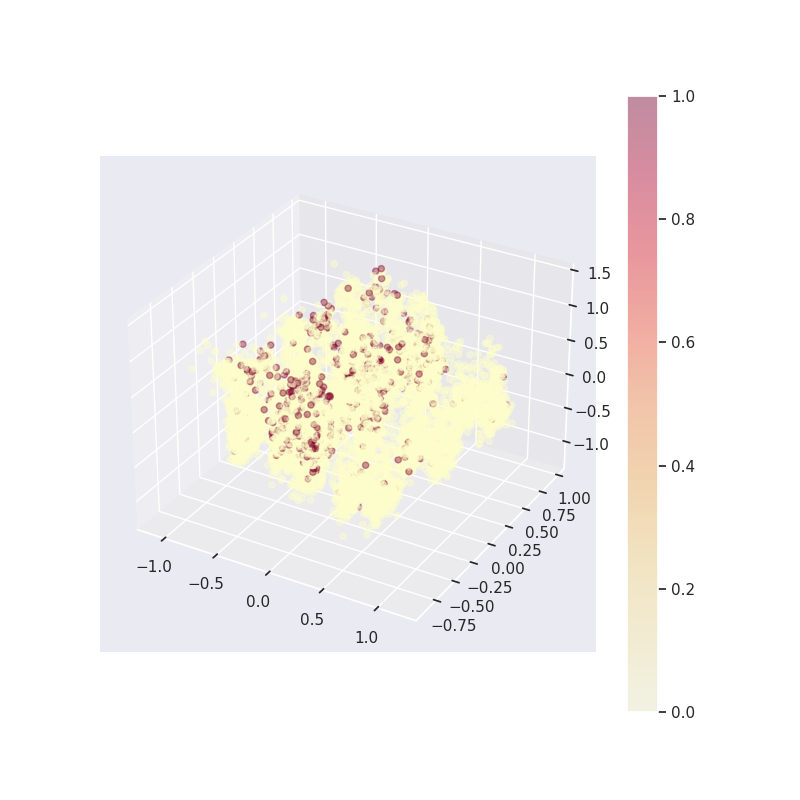

In [24]:
pca = PCA(n_components=3, random_state = 1)
df_pca = pca.fit_transform(X)

df_vis = pd.DataFrame(df_pca)
df_vis['y'] = y

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
sns.set(style = "darkgrid")

xp = df_vis[0]
yp = df_vis[1]
zp = df_vis[2]

c= df_vis['y']
img = ax.scatter(xs=xp, ys=yp, zs=zp, c=y, cmap='YlOrRd', alpha=.4)
fig.colorbar(img)
plt.show()


### t-distributed Stochastic Neighbor Embedding - TSNE View

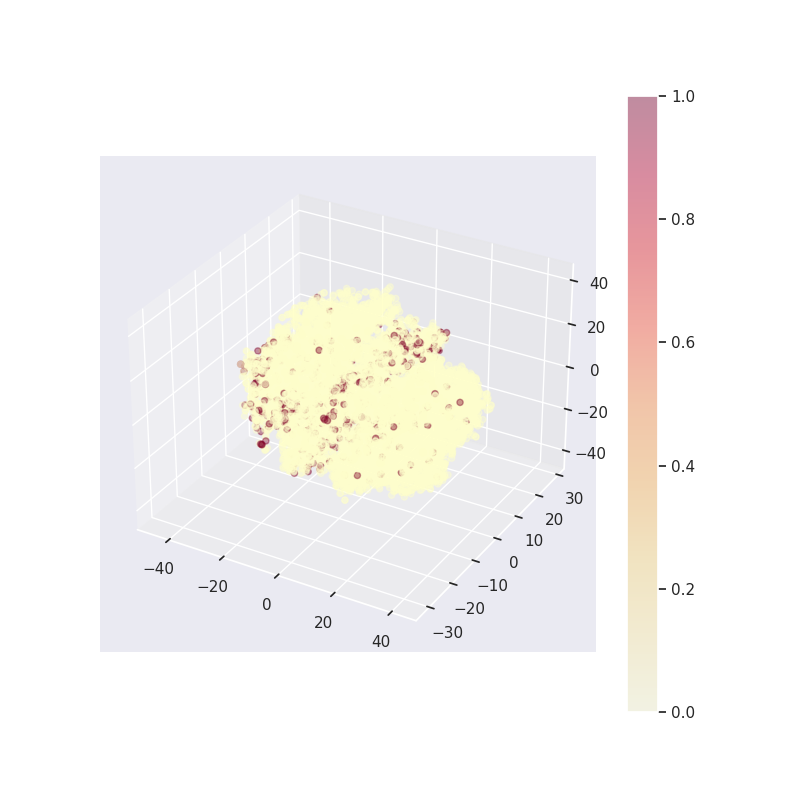

In [25]:
tsne = TSNE(
    n_components=3, 
    random_state = 1,
    n_jobs = -1,
    n_iter_without_progress=200
)

df_tsne = tsne.fit_transform(X)

df_vis = pd.DataFrame(df_tsne)
df_vis['y'] = y

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
sns.set(style = "darkgrid")

xp = df_vis[0]
yp = df_vis[1]
zp = df_vis[2]

c= df_vis['y']
img = ax.scatter(xs=xp, ys=yp, zs=zp, c=y, cmap='YlOrRd', alpha=.4)
fig.colorbar(img)
plt.show()

### Uniform Manifold Approximation and Projection - UMAP View

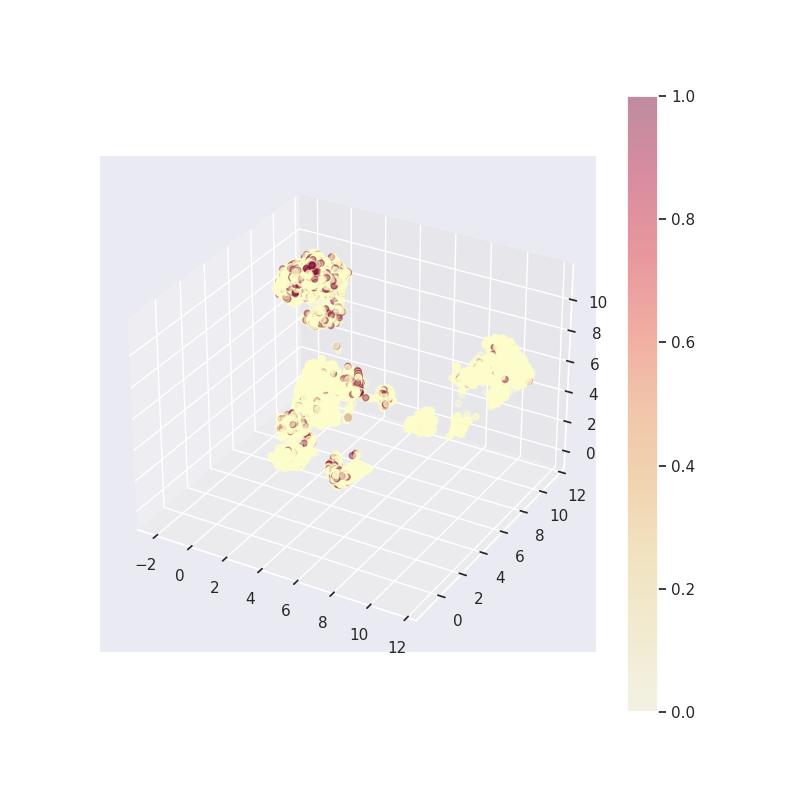

In [26]:
umap_m = umap.UMAP(
    n_components=3, 
    random_state=1, 
    n_neighbors=5
)

df_umap = umap_m.fit_transform(X)

df_vis = pd.DataFrame(df_umap)
df_vis['y'] = y

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
sns.set(style = "darkgrid")

xp = df_vis[0]
yp = df_vis[1]
zp = df_vis[2]

c= df_vis['y']
img = ax.scatter(xs=xp, ys=yp, zs=zp, c=y, cmap='YlOrRd', alpha=.4)
fig.colorbar(img)
plt.show()

### Linear Discriminant Analysis - LDA 

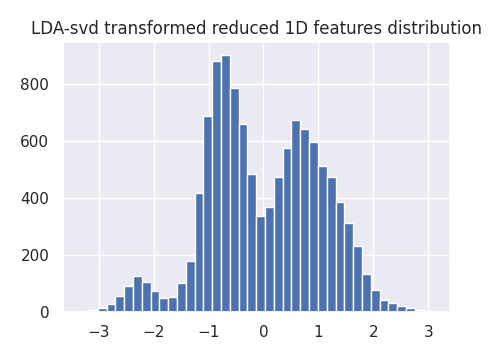

In [27]:
lda = LinearDiscriminantAnalysis(solver='svd')
svd_lda = lda.fit_transform(X, y)

plt.figure(figsize = (5, 3.5))
plt.hist(x = svd_lda, bins = 40)
plt.title('LDA-svd transformed reduced 1D features distribution')
plt.show()


Note: We see a twin peaked histogram corrosponding to two output classes.<br>
Or more intuitively two histograms overlapping with each other.<br>
Thus the classes are not readily seperable or the dataset is a 'hard' dataset for prediction purposes.

### PCA Revisited - Understanding feature Covariances and selecting the number of feature components

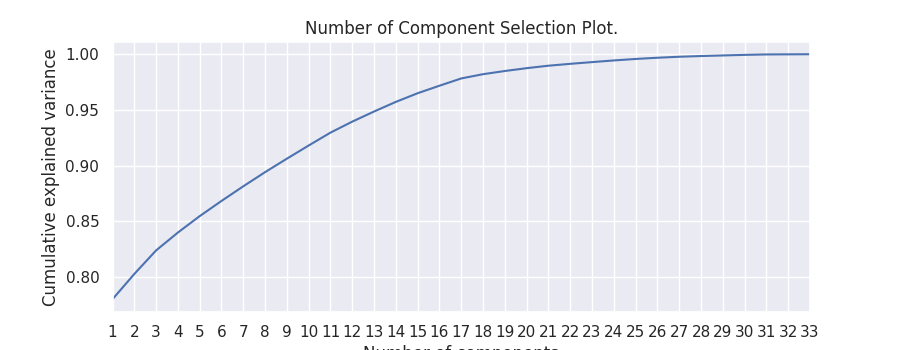

In [28]:
#PCA Understanding feature Covariances and selecting the number of feature components
cov = (X.T @ X) / (X.shape[0] - 1)
eig_values, eig_vectors = np.linalg.eig(cov)
idx = np.argsort(eig_values, axis=0)[::-1]
sorted_eig_vectors = eig_vectors[:, idx]

cumsum = np.cumsum(eig_values[idx]) / np.sum(eig_values[idx])
xint = range(1, len(cumsum) + 1)

plt.figure(figsize = (9, 3.5))
sns.set(style = "darkgrid")
plt.plot(xint, cumsum)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Number of Component Selection Plot.")
plt.xticks(xint)
plt.xlim(1, len(cumsum), 1)
plt.show()

We see that at about 17 components 98% of the covariance is explained.

### End of EDA